In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

np.random.seed(0)


In [29]:
# Input parameters. (0.1초마다 / 총 4초간)
time_end = 4
dt= 0.1

In [30]:
def get_pos_vel(itime, pos_true):
    """측정된 위치와 실제 속도 및 실제 위치 반환하는 함수"""
    w = np.random.normal(0, np.sqrt(10))      # w: system noise (시스템 소음)
    v = np.random.normal(0, np.sqrt(10))      # v: measurement noise (측정 소음)

    vel_true = 80 + w                         # nominal velocity = 80 [m/s].
    if itime == 0:
        pos_true = pos_true
    else:
        pos_true = pos_true + vel_true * dt
    z_pos_meas = pos_true + v                 # z_pos_meas: measured position (관찰가능한)
    return z_pos_meas, vel_true, pos_true


In [84]:
# Initialization for system model. (시스템모델 초기화)
# Matrix: A, H, Q, R, P_0 (행렬값)
# Vector: x_0 (벡터값)
A = np.array([[1, dt],
              [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[1, 0],
              [0, 3]])
R = np.array([[10]])

# Initialization for estimation.
x_0 = np.array([0, 20])  # position and velocity
P_0 = 5 * np.eye(2) # 2 * 2 행렬 생성

print(A, x_0, A @ x_0)
print(A, P, A.T, Q, A @ P @ A.T + Q)
print(A)
print(A.T)


def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm."""
    # (1) Prediction.
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q

    # (2) Kalman Gain.
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)

    # (3) Estimation.
    x_esti = x_pred + K @ (z_meas - H @ x_pred)

    # (4) Error Covariance.
    P = P_pred - K @ H @ P_pred

    return x_esti, P

[[1.  0.1]
 [0.  1. ]] [ 0 20] [ 2. 20.]
[[1.  0.1]
 [0.  1. ]] [[ 3.66756938  4.35858857]
 [ 4.35858857 25.24374331]] [[1.  0. ]
 [0.1 1. ]] [[1 0]
 [0 3]] [[ 5.79172452  6.8829629 ]
 [ 6.8829629  28.24374331]]
[[1.  0.1]
 [0.  1. ]]
[[1.  0. ]
 [0.1 1. ]]


In [81]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
pos_meas_save = np.zeros(n_samples)
pos_true_save = np.zeros(n_samples)
vel_true_save = np.zeros(n_samples)
pos_esti_save = np.zeros(n_samples)
vel_esti_save = np.zeros(n_samples)


pos_true = 0
x_esti, P = None, None
for i in range(n_samples):
    z_meas, vel_true, pos_true = get_pos_vel(i, pos_true)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    pos_meas_save[i] = z_meas
    vel_true_save[i] = vel_true
    pos_esti_save[i] = x_esti[0]
    vel_esti_save[i] = x_esti[1]


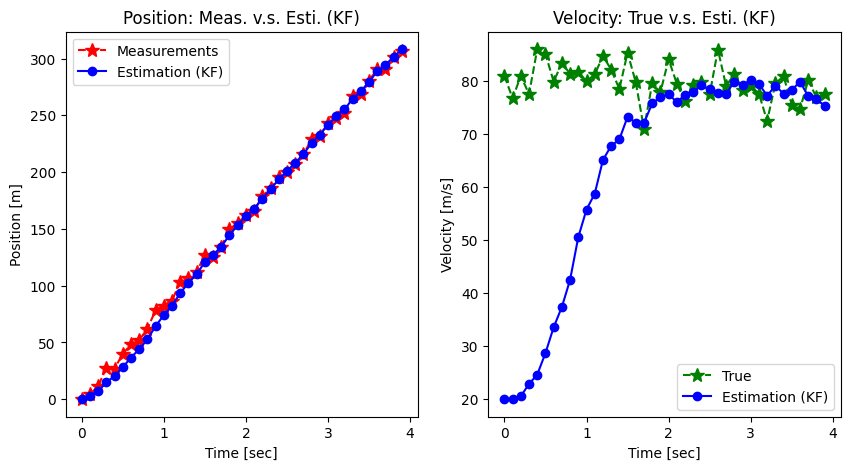

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(time, pos_meas_save, 'r*--', label='Measurements', markersize=10)
plt.plot(time, pos_esti_save, 'bo-', label='Estimation (KF)')
plt.legend(loc='upper left')
plt.title('Position: Meas. v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')

plt.subplot(1, 2, 2)
plt.plot(time, vel_true_save, 'g*--', label='True', markersize=10)
plt.plot(time, vel_esti_save, 'bo-', label='Estimation (KF)')
plt.legend(loc='lower right')
plt.title('Velocity: True v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Velocity [m/s]')
plt.show()


In [85]:
def get_pos_vel(itime):
    """Return Measured Velocity and True Position."""
    v = np.random.normal(0, np.sqrt(10))  # v: measurement noise.

    vel_true = 80                         # nominal velocity = 80 [m/s]. no system noise here.
    pos_true = vel_true * (itime * dt)    # pos_true: true position. 
    z_vel_meas = vel_true + v             # z_vel_meas: measured velocity (observable) 

    return z_vel_meas, pos_true

# 속도로 위치 추정하기

햏렬 H만 [1 0]에서 [0 1]로 변경

In [87]:


# Initialization for system model.
# Matrix: A, H, Q, R, P_0
# Vector: x_0
A = np.array([[1, dt],
              [0, 1]])
H = np.array([[0, 1]])  # 측정값이 
Q = np.array([[1, 0],
              [0, 3]])
R = np.array([[10]])

# Initialization for estimation.
x_0 = np.array([0, 20])  # position and velocity
P_0 = 5 * np.eye(2)

time = np.arange(0, time_end, dt)
n_samples = len(time)
vel_meas_save = np.zeros(n_samples)
pos_true_save = np.zeros(n_samples)
pos_esti_save = np.zeros(n_samples)
vel_esti_save = np.zeros(n_samples)


x_esti, P = None, None
for i in range(n_samples):
    z_meas, pos_true = get_pos_vel(i)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    vel_meas_save[i] = z_meas
    pos_true_save[i] = pos_true
    pos_esti_save[i] = x_esti[0]
    vel_esti_save[i] = x_esti[1]


Text(0, 0.5, 'Position [m]')

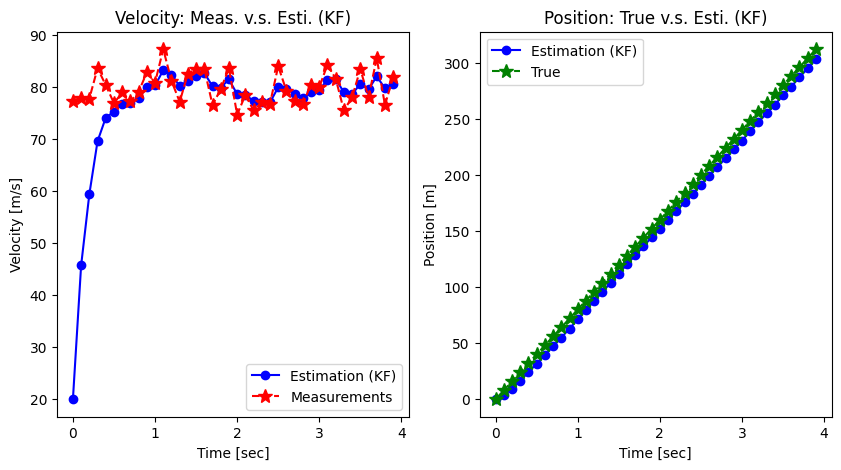

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(time, vel_esti_save, 'bo-', label='Estimation (KF)')
plt.plot(time, vel_meas_save, 'r*--', label='Measurements', markersize=10)
plt.legend(loc='lower right')
plt.title('Velocity: Meas. v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Velocity [m/s]')

plt.subplot(1, 2, 2)
plt.plot(time, pos_esti_save, 'bo-', label='Estimation (KF)')
plt.plot(time, pos_true_save, 'g*--', label='True', markersize=10)
plt.legend(loc='upper left')
plt.title('Position: True v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')
